### **Sentence Sentiment Analysis**
This is a project of Group 49 under the IT1244 course. It explores different methods common in NLP to classify the sentiment of sentences in movie reviews. By comparing the results of the methods explored, we evaluate the optimum method for the dataset used, and suggest possible reasons for our findings.



# **1. Background Research**


Reviewing past research regarding sentiment analysis, we examined ready-made sentiment libraries developed by researchers, besides common ML techniques and word embedding algorithms utilised in the field.

We did background research on specifically two sentiment libraries:
1. VADER: We reviewed  VADER (Valence Aware  Dictionary  for sEntiment Reasoning), a model developed by Hutto and Gilbert (2014). It provides a sentiment score for a given text according to a dictionary of words and rules, using valence scores for every single word to determine its positivity or negativity. However, the model is generally tailored to the lexicons and language structures commonly found in social media, which is mostly short, informal sentences.

2. TextBlob: We looked at another Python library designed to process textual data for natural language processing tasks. We examined a model where TextBlob and Deep Learning are integrated to analyze social media comments in regards to the airline industry in the US (Aljedaani et al. 2022). The model yielded a high accuracy in the predictions of the sentiments of comments. However, it warns against possible mislabelling of data as a potential drawback regarding the accuracy of the model, suggesting the need to manually review the outcomes of artificial models.

The two libraries we examined are trained with user comments taken from social media platforms. As outlined in the report, while these libraries perform well in textual data from social media, there remained doubt on its effectiveness in movie review sentiments. Thus, we acknowledge the need to develop an ML method to predict sentiments of movie reviews. Besides that, as noted in the case of possible misclassification, we output the results to crosscheck the sentences to identify possible intrinsic misclassifications in the data.

For preprocessing and common ML techniques, we reviewed an article by Wankhade et al. (2022). Specifically, we focused on the section for Traditional Machine Learning, and gained inspirations on how to process and utilise the date to build a suitable ML model.

**References:**
1. Aljedaani, Wajdi, et al. “Sentiment Analysis on Twitter Data Integrating TextBlob and Deep Learning Models: The Case of US Airline Industry.” Knowledge-Based Systems, vol. 255, Nov. 2022, p. 109780, https://doi.org/10.1016/j.knosys.2022.109780.  
2. Hutto, C., and Eric Gilbert. “VADER: A Parsimonious Rule-Based Model for Sentiment Analysis of Social Media Text.” Proceedings of the International AAAI Conference on Web and Social Media, vol. 8, no. 1, 16 May 2014, pp. 216–225, https://doi.org/10.1609/icwsm.v8i1.14550.
3. Wankhade, M., Rao, A.C.S. & Kulkarni, C. A survey on sentiment analysis methods, applications, and challenges. Artif Intell Rev 55, 5731–5780 (2022). https://doi.org/10.1007/s10462-022-10144-1



# **2. Loading and Exploring Datasets**


Required libraries, modules and dataset for the model are loaded here. Some libraries may need to be downloaded before it can be loaded.

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud

import nltk
nltk.download('punkt')
nltk.download('words')
nltk.download('word_tokenize')
nltk.download('WordNetLemmatizer')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from gensim.models import Word2Vec

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB

!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Error loading word_tokenize: Package 'word_tokenize' not
[nltk_data]     found in index
[nltk_data] Error loading WordNetLemmatizer: Package
[nltk_data]     'WordNetLemmatizer' not found in index
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Basic exploratory data analysis is performed in this section. The columns of the dataset are renamed as "Sentence" and "Sentiment" for easy access. The lengths of the sentences are then plotted out, separated by the sentiment of the sentences.

*Note: Do copy and paste the destination path of the file to read the dataset.*

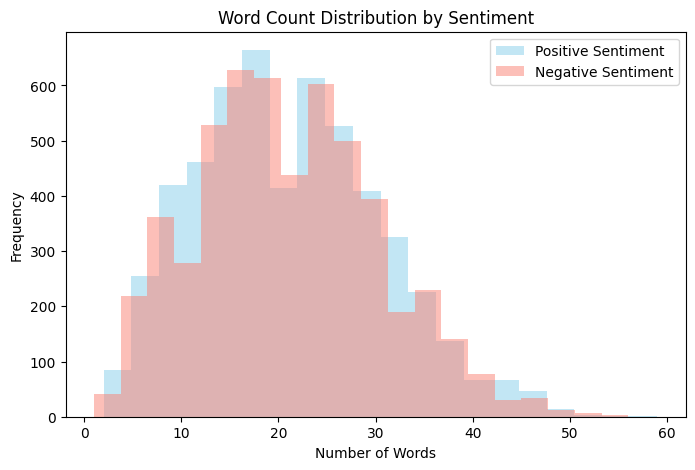

In [7]:
data = pd.read_csv("/content/dataset.csv") # Paste the full destination path to the dataset inside the brackets.

data.head()
# Renaming columns of dataset
data.columns = ['Sentiment', 'Sentence']

# Create new column to count length of individual sentences
length_data = data.copy()
length_data['Num_Words'] = length_data['Sentence'].apply(lambda x: len(x.split()))

# Separate data by sentiment
positive_lengths = length_data[length_data['Sentiment'] == 1]['Num_Words']
negative_lengths = length_data[length_data['Sentiment'] == 0]['Num_Words']

# Plot histogram of length of sentences grouped by sentiment
plt.figure(figsize=(8, 5))

plt.hist(positive_lengths, color='skyblue', alpha=0.5, label='Positive Sentiment', bins=20)
plt.hist(negative_lengths, color='salmon', alpha=0.5, label='Negative Sentiment', bins=20)

plt.title('Word Count Distribution by Sentiment')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()

plt.show()

Word cloud analysis is performed to gauge common words in sentences of different sentiments.

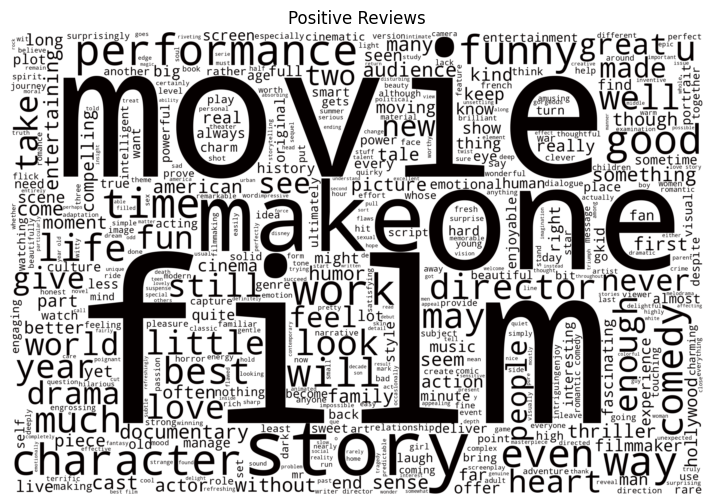

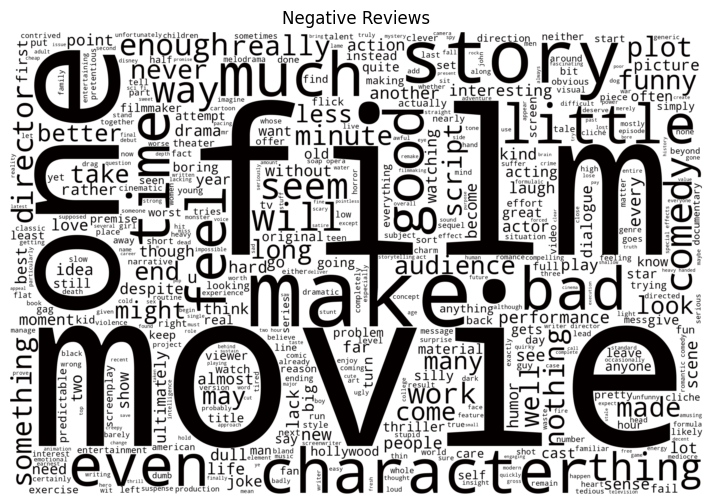

In [8]:
# Plot word cloud of sentences of positive and negative sentiments.
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

positive_reviews = data[data['Sentiment'] == 1]['Sentence']
negative_reviews = data[data['Sentiment'] == 0]['Sentence']

positive_wordcloud = WordCloud(background_color="white",
               width=3000,
               height=2000,
               max_words=500).generate(' '.join(positive_reviews))
negative_wordcloud = WordCloud(background_color="white",
               width=3000,
               height=2000,
               max_words=500).generate(' '.join(negative_reviews))

positive_wordcloud.recolor(color_func = black_color_func)
negative_wordcloud.recolor(color_func = black_color_func)

plt.figure(figsize=[12,6])
plt.imshow(positive_wordcloud, interpolation="bilinear");
plt.axis("off")
plt.title('Positive Reviews')
plt.show()

plt.figure(figsize=[12, 6])
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews')
plt.show()

# **3. Preprocessing data**


First, we detect noise in our dataset by filtering sentences containing typos or non-English words and printing them out to gauge the type of noise in the dataset. We do this by simulating common language preprocessing tasks on our dataset, including tokenization, lemmatization and removal of stop words. By visualising the resulting data on a word cloud to compare with data before preprocessing, we aim to determine the effects of preprocessing on the dataset.

After that, we performed word embeddings to our dataset to convert our textual data into number vectors for the use of machine learning algorithms. Two types of word embedding are used, namely Word2Vec and TF-IDF.

In [11]:
test_data = data.copy()

def detect_noise(tokens):
    english_words = set(words.words())
    noisy_sentences = []
    for idx, sentence_tokens in enumerate(tokens):
        detected_errors = [token for token in sentence_tokens if token not in english_words]
        if detected_errors:
            noisy_sentences.append((idx, detected_errors))
    return noisy_sentences

def preprocess(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

test_data['Tokens'] = [preprocess(sentence) for sentence in test_data['Sentence']]
noisy_sentences = detect_noise(test_data['Tokens'])
print("Sentences with noise:")
count = 0
for idx, errors in noisy_sentences:
    print("Sentence:", data['Sentence'][idx])
    print("Errors:", errors)
    count += 1
    if count == 20:
      break

Sentences with noise:
Sentence: the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson's expanded vision of j . r . r . tolkien's middle-earth .
Errors: ['jackson', 'tolkien']
Sentence: effective but too-tepid biopic
Errors: ['biopic']
Sentence: emerges as something rare , an issue movie that's so honest and keenly observed that it doesn't feel like one .
Errors: ['emerges', 'observed']
Sentence: the film provides some great insight into the neurotic mindset of all comics -- even those who have reached the absolute top of the game .
Errors: ['provides', 'mindset', 'reached']
Sentence: perhaps no picture ever made has more literally showed that the road to hell is paved with good intentions .
Errors: ['showed', 'paved']
Sentence: take care of my cat offers a refreshingly different slice of asian cinema .
Errors: ['asian']
Sentence: what really surprises about wisegirls is it

Word cloud is generated for the tokens after preprocessing of the dataset.

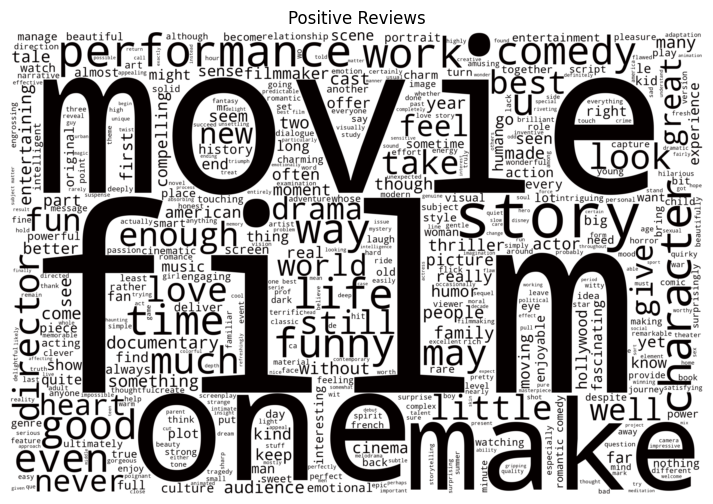

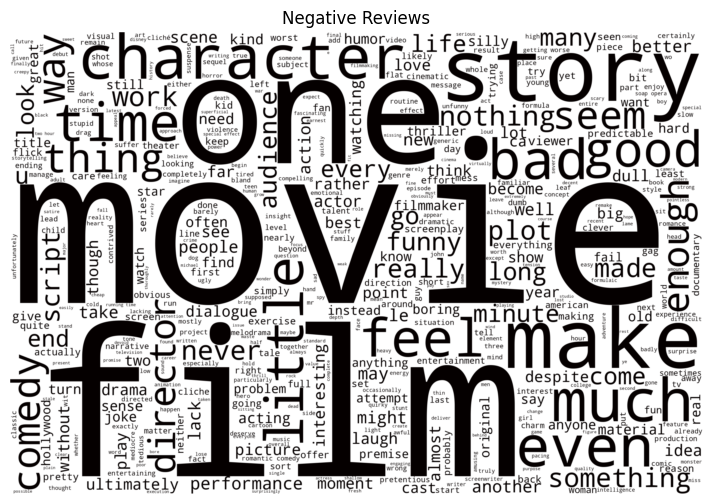

In [12]:
# Generating Word Cloud
positive_tokens = test_data[test_data['Sentiment'] == 1]['Tokens'].tolist()
negative_tokens = test_data[test_data['Sentiment'] == 0]['Tokens'].tolist()

positive_text = ' '.join([word for sublist in positive_tokens for word in sublist])
negative_text = ' '.join([word for sublist in negative_tokens for word in sublist])

positive_wordcloud = WordCloud(background_color="white",
               width=3000,
               height=2000,
               max_words=500).generate(positive_text)
negative_wordcloud = WordCloud(background_color="white",
               width=3000,
               height=2000,
               max_words=500).generate(negative_text)

positive_wordcloud.recolor(color_func = black_color_func)
negative_wordcloud.recolor(color_func = black_color_func)

plt.figure(figsize=[12,6])
plt.imshow(positive_wordcloud, interpolation="bilinear");
plt.axis("off")
plt.title('Positive Reviews')
plt.show()

plt.figure(figsize=(12, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews')
plt.show()

We experiment with common word embeddings, i.e. Word2Vec and TF-DIF to represent our langauge-based data in vectors of numbers.

**Embedding 1: Word2Vec**

In this case, we are generating embedding based on a Word2Vecmodel that is already trained beforehand on a large corpus. The embedding aims to capture information about the meaning of the word based on the surrounding words.

In [13]:
vec_data = test_data.copy()

sentences = [text.split() for text in vec_data['Sentence']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

def map_to_embeddings(sentence):
    embeddings = [word2vec_model.wv[word] for word in sentence.split() if word in word2vec_model.wv]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(100)  # Use zero vector for out-of-vocabulary words

vec_data['Embeddings'] = vec_data['Sentence'].apply(map_to_embeddings)
word2vec_df = pd.DataFrame(vec_data['Embeddings'].tolist())
print(word2vec_df)

             0         1         2         3         4         5         6   \
0     -0.518825  0.494129  0.004367  0.055353 -0.037912 -0.718316  0.357848   
1     -0.273025  0.388541  0.037000  0.070075 -0.039601 -0.456125  0.226685   
2     -0.684338  0.945635  0.121568  0.211564 -0.162428 -1.213661  0.468381   
3     -0.598144  0.827184  0.083895  0.177513 -0.088009 -0.993446  0.441236   
4     -0.645137  0.733173  0.055665  0.165942 -0.070283 -0.932689  0.483509   
...         ...       ...       ...       ...       ...       ...       ...   
10656 -0.596912  0.804122  0.087487  0.182897 -0.102263 -0.991171  0.458296   
10657 -0.612696  0.740358  0.071007  0.184372 -0.117180 -0.909763  0.443263   
10658 -0.540135  0.595852  0.024384  0.122877 -0.019902 -0.744990  0.413707   
10659 -0.580828  0.697560  0.070945  0.168495 -0.029886 -0.886069  0.459235   
10660 -0.606028  0.830472  0.071015  0.196893 -0.023267 -0.975451  0.520686   

             7         8         9   ...        90 

**Embedding 2: TF-DIF**

 TF–IDF, short for Term Frequency–Inverse Document Frequency, is an embedding that measures the importance of a word to a document in a collection or corpus, adjusted for the fact that some words appear more frequently in general.

In [14]:


tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(test_data['Sentence'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df)


        00  000  007   10  100  101  102  103  104  105  ...  zwick  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   
10656  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
10657  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
10658  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
10659  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
10660  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   

       zzzzzzzzz   às  ápice  élan  ótimo  último  últimos  única  único  
0            0.0  0.0    0.0   0.0    0.0     0.0      0.0    0.0    0.0

# **4. Selecting ML Models**


After embedding the dataset, the resultant vectors are splitted into training and testing datasets. We employ common ML models used in NLP, including Logistic Regression, Random Forest, Extra Trees and Naive Bayes. The results are evaluated with various metrics, including accuracy, recall, F-score and ROC-AUC scores.

*Note: Before running the code, please select the intended embedding to use for the model (Word2Vec or TF-IDF) and uncomment the particular section as noted in the comments.*

Logistic Regression
Accuracy: 0.7576183778715424
Recall: 0.7594568380213385
Precision: 0.7442965779467681
ROC-AUC: 0.8477004159618083
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      1102
           1       0.74      0.76      0.75      1031

    accuracy                           0.76      2133
   macro avg       0.76      0.76      0.76      2133
weighted avg       0.76      0.76      0.76      2133



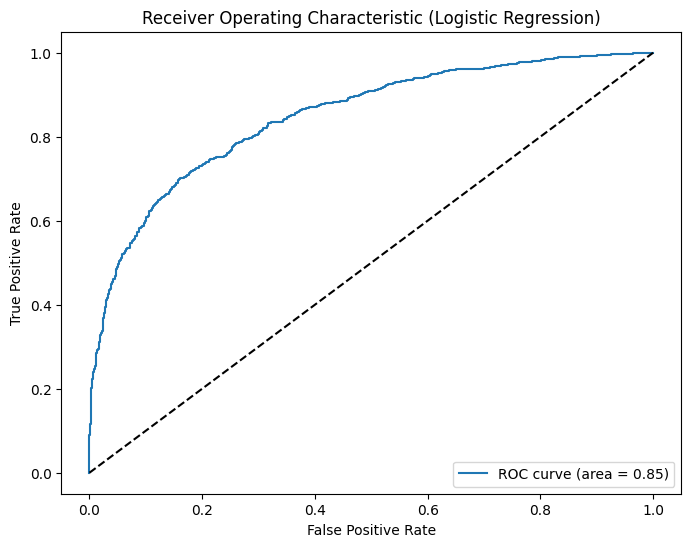

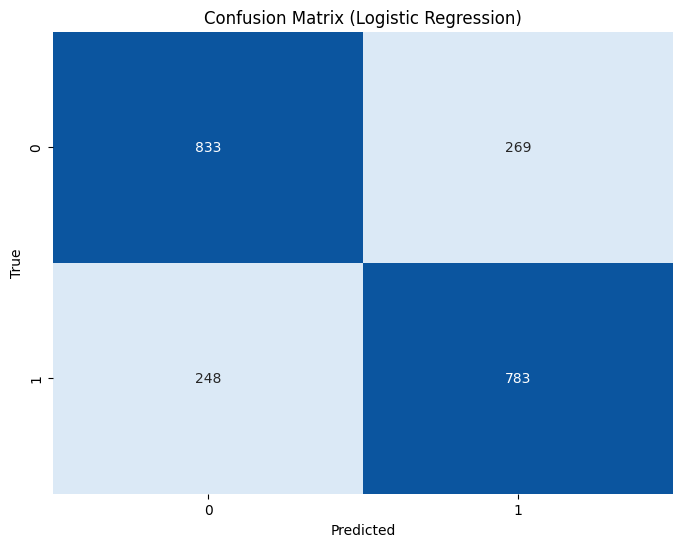


Random Forest
Accuracy: 0.7027660571964369
Recall: 0.7109602327837051
Precision: 0.6856875584658559
ROC-AUC: 0.7670046172992936
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1102
           1       0.69      0.71      0.70      1031

    accuracy                           0.70      2133
   macro avg       0.70      0.70      0.70      2133
weighted avg       0.70      0.70      0.70      2133



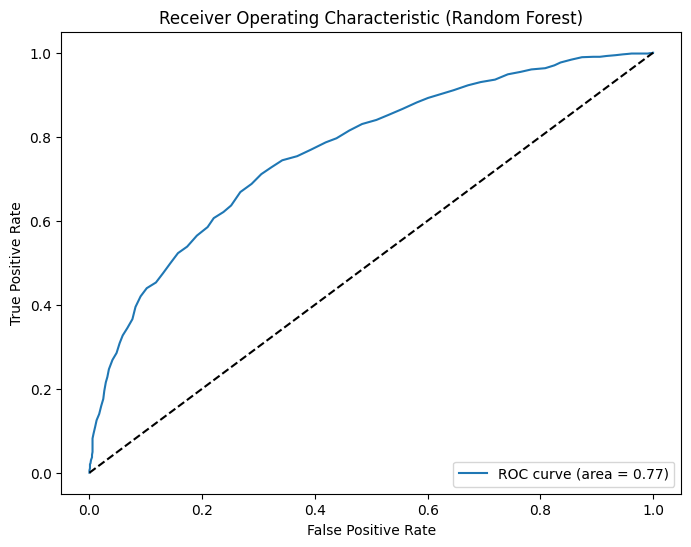

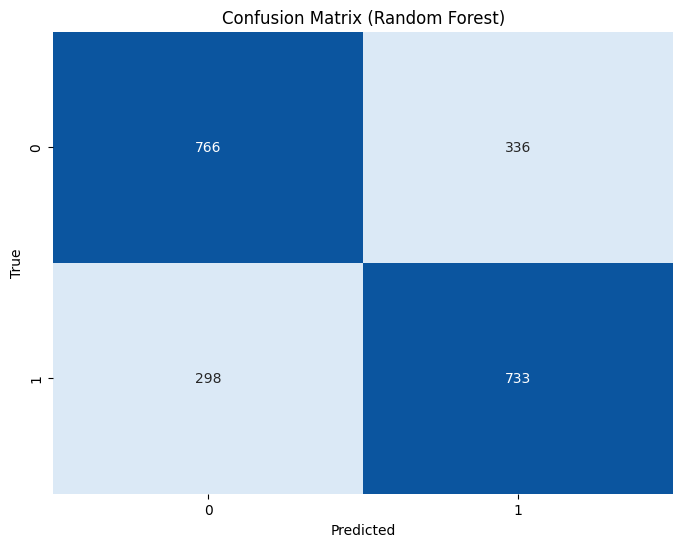


Extra Trees
Accuracy: 0.7341772151898734
Recall: 0.7167798254122212
Precision: 0.7287968441814595
ROC-AUC: 0.8088239177159596
              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1102
           1       0.73      0.72      0.72      1031

    accuracy                           0.73      2133
   macro avg       0.73      0.73      0.73      2133
weighted avg       0.73      0.73      0.73      2133



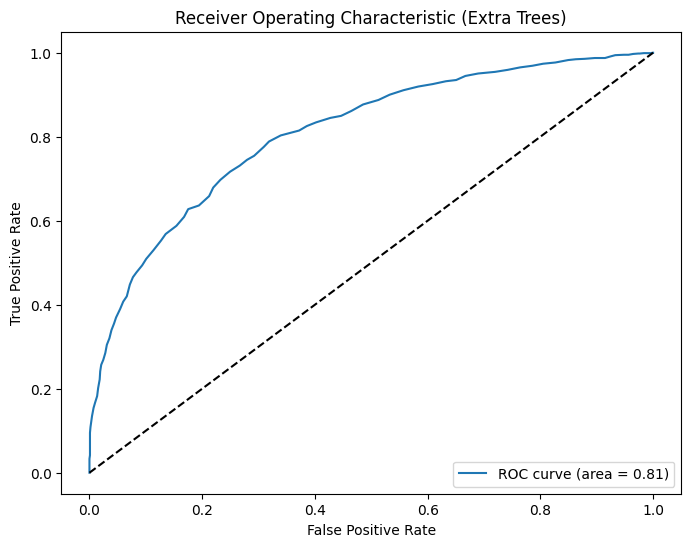

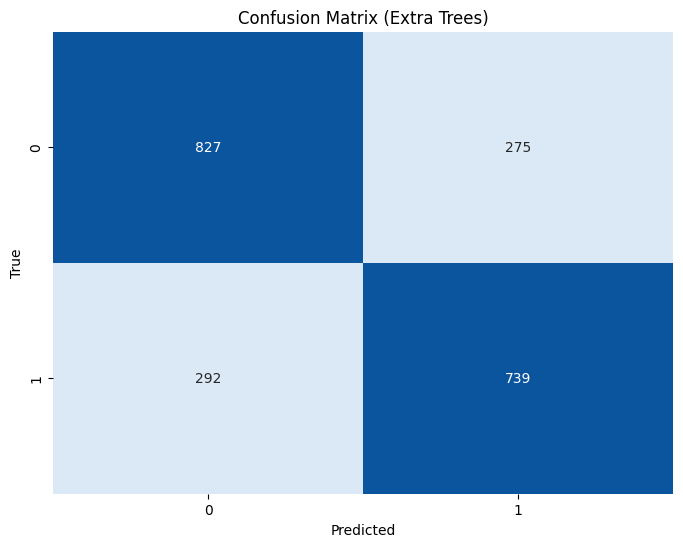


Multinomial Naive Bayes
Accuracy: 0.7805907172995781
Recall: 0.7807953443258971
Precision: 0.7688634192932188
ROC-AUC: 0.8738736201351569
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1102
           1       0.77      0.78      0.77      1031

    accuracy                           0.78      2133
   macro avg       0.78      0.78      0.78      2133
weighted avg       0.78      0.78      0.78      2133



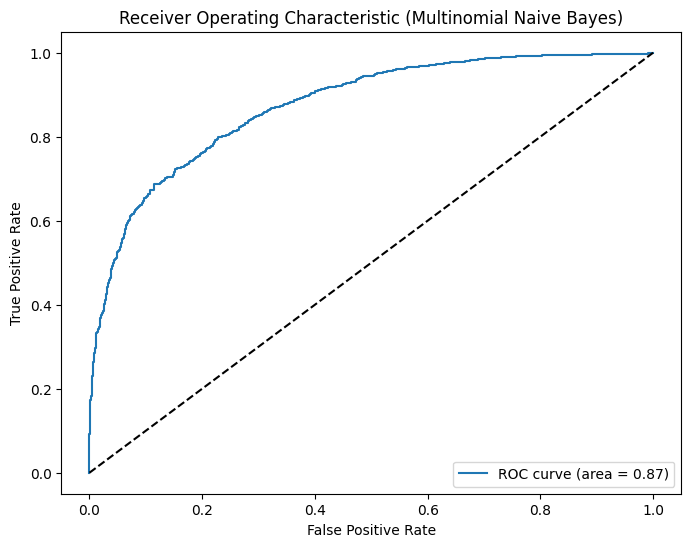

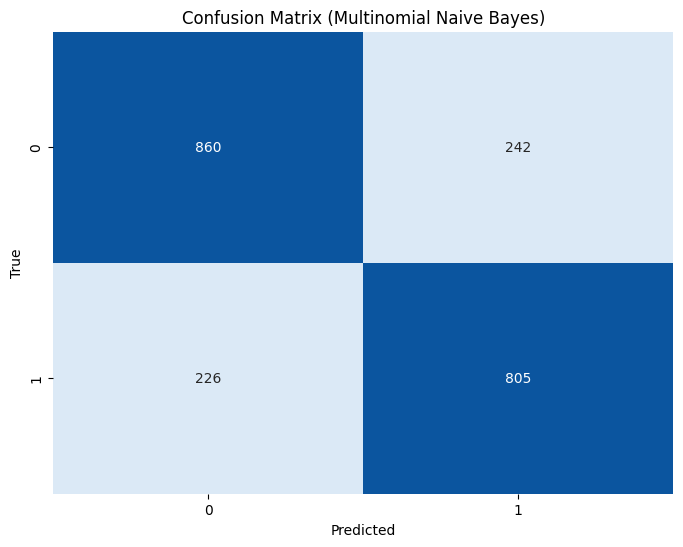

In [15]:
def plot_roc_curve(y_true, y_pred_proba, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (' + title + ')')
    plt.legend(loc="lower right")
    plt.show()

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=sns.color_palette("Blues"), cbar=False)
    plt.title('Confusion Matrix (' + title + ')')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def evaluate(name,y_test, y_pred,y_pred_proba):
    print(name)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    recall = recall_score(y_test, y_pred, average='binary', pos_label=1)
    print("Recall:", recall)
    precision = precision_score(y_test, y_pred, average='binary', pos_label=1)
    print("Precision:", precision)
    roc =  roc_auc_score(y_test, y_pred_proba)
    print("ROC-AUC:", roc)
    print(classification_report(y_test, y_pred))
    plot_roc_curve(y_test, y_pred_proba, name)
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, name)
    print()

##############################
#To select embedding, please uncomment the appropriate code blocks.
##############################

# Option 1: Word2Vec

# Start uncommenting here
# X = word2vec_df
# is_word2vec = True
# Stop uncommenting here

# Option 2: TF-IDF

# Start uncommenting here
X = np.vstack(tfidf_df.to_numpy())
is_word2vec = False
# Stop uncommenting here

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, data['Sentiment'].to_numpy(), data.index, test_size=0.2)

logistic_regression = LogisticRegression(max_iter=1500)
logistic_regression.fit(X_train, y_train)
y_pred_log = logistic_regression.predict(X_test)
y_pred_proba_log = logistic_regression.predict_proba(X_test)[:, 1]
evaluate("Logistic Regression",y_test, y_pred_log, y_pred_proba_log)

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
y_pred_proba_rf = random_forest.predict_proba(X_test)[:, 1]
evaluate("Random Forest",y_test, y_pred_rf, y_pred_proba_rf)

extra_trees = ExtraTreesClassifier()
extra_trees.fit(X_train, y_train)
y_pred_et = extra_trees.predict(X_test)
y_pred_proba_et = extra_trees.predict_proba(X_test)[:, 1]
evaluate("Extra Trees", y_test, y_pred_et, y_pred_proba_et)

if is_word2vec:
  naive_bayes = GaussianNB()
  naive_bayes.fit(X_train, y_train)
  y_pred_nb = naive_bayes.predict(X_test)
  y_pred_proba_nb = naive_bayes.predict_proba(X_test)[:, 1]
  evaluate("Gaussian Naive Bayes",y_test, y_pred_nb, y_pred_proba_nb)
else:
  naive_bayes = MultinomialNB()
  naive_bayes.fit(X_train, y_train)
  y_pred_nb = naive_bayes.predict(X_test)
  y_pred_proba_nb = naive_bayes.predict_proba(X_test)[:, 1]
  evaluate("Multinomial Naive Bayes",y_test, y_pred_nb, y_pred_proba_nb)

**NOTE: The following codeblocks are under the assumption that Naive Bayes with TF-IDF embedding is identified as the optimal model. If the model is not trained under TF-IDF embedding, please retrain the model with TF-IDF embedding before continuing.**

We identify Naive-Bayes as the most optimal ML model in our dataset. Thus, grid search is used for hyperparametric tuning to obtain the optimal value for alpha in the Naive-Bayes, which includes cross validation in the algorithm. Using the optimal value, the Naive-Bayes model is retrained.

Best hyperparameters: {'alpha': 0.8}
Multinomial Naive Bayes (Tuned)
Accuracy: 0.784341303328645
Recall: 0.7856450048496605
Precision: 0.7721639656816015
ROC-AUC: 0.8742635293206428
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1102
           1       0.77      0.79      0.78      1031

    accuracy                           0.78      2133
   macro avg       0.78      0.78      0.78      2133
weighted avg       0.78      0.78      0.78      2133



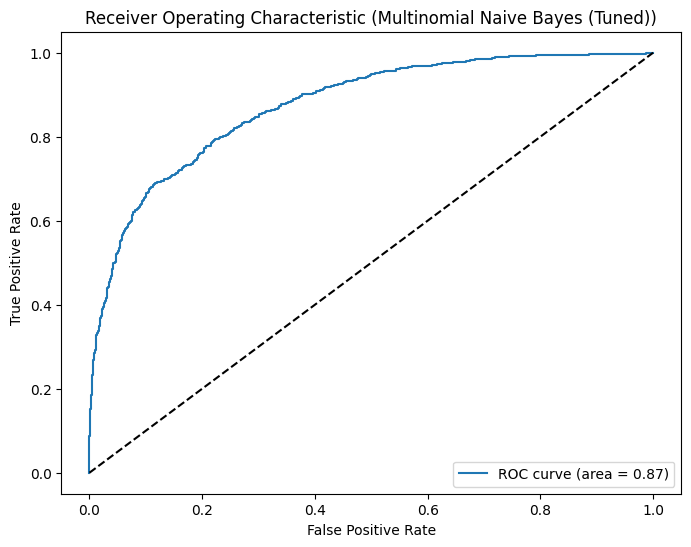

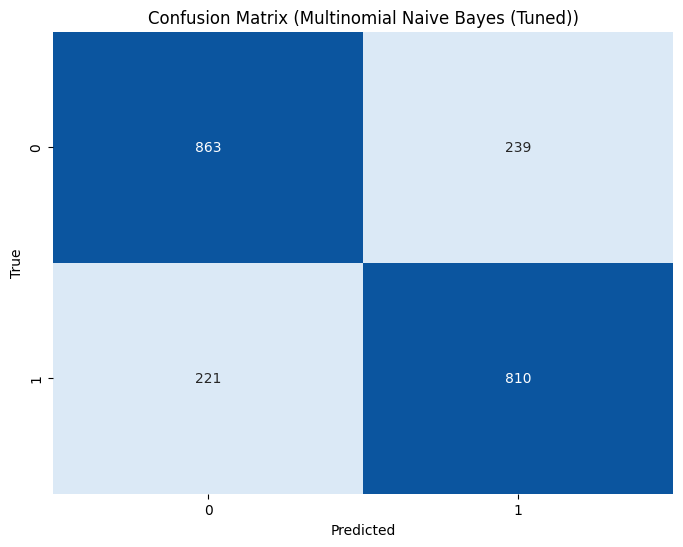

In [16]:
param_grid = {'alpha': [0.8,0.9,1.0,1.1,1.2]}
naive_bayes = MultinomialNB()
grid_search = GridSearchCV(naive_bayes, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_naive_bayes = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_nb = best_naive_bayes.predict(X_test)
y_pred_proba_best_nb = best_naive_bayes.predict_proba(X_test)[:, 1]
evaluate("Multinomial Naive Bayes (Tuned)", y_test, y_pred_best_nb, y_pred_proba_best_nb)

# **5. Evaluating the Model**


To evaluate the model that we have trained, we retrieve sentences that the model has predicted wrongly and analyse similarities within the sentences.

In [17]:
wrong_pred_indices = indices_test[y_test != y_pred_best_nb]
print("Number of Incorrectly Predicted Sentences:", len(wrong_pred_indices))
print()

count = 0
for i in wrong_pred_indices:
    print("Sentence:", data['Sentence'][i])
    print("Actual Sentiment:", data['Sentiment'][i])
    print()
    count += 1
    if count == 30: #change this number to see more/less reviews
      break

Number of Incorrectly Predicted Sentences: 460

Sentence: with a tone as variable as the cinematography , schaeffer's film never settles into the light-footed enchantment the material needs , and the characters' quirks and foibles never jell into charm .
Actual Sentiment: 0

Sentence: would be an unendurable viewing experience for this ultra-provincial new yorker if 26-year-old reese witherspoon were not on hand to inject her pure fantasy character , melanie carmichael , with a massive infusion of old-fashioned hollywood magic .
Actual Sentiment: 1

Sentence: looks awfully like one long tourist spot for a mississippi that may never have existed outside of a scriptwriter's imagination .
Actual Sentiment: 0

Sentence: they kept much of the plot but jettisoned the stuff that would make this a moving experience for people who haven't read the book .
Actual Sentiment: 0

Sentence: a depressing confirmation of everything those of us who don't object to the description " unelected " have susp

Besides, we have also introduced external pretrained sentiment analysis models (Textblob, VADER) and implement them on our datasets for comparison against our models.

1. Textblob: We tested our data on Textblob, a pretrained Lexicon-based sentiment analyzer that has predefined rules of the sentiments of individuals words.

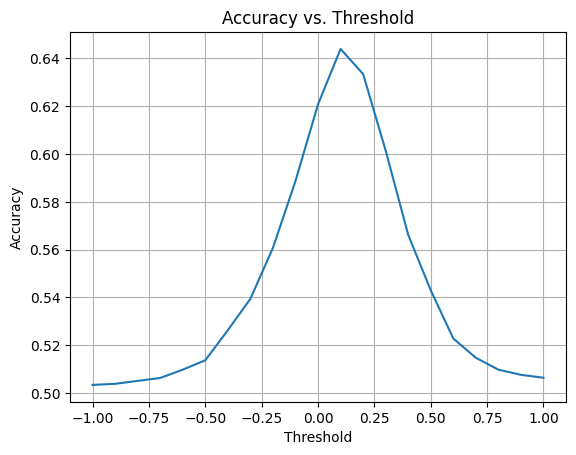

Threshold 0.09999999999999964
Maximum Accuracy: 0.6439358409154864


In [18]:
sentiments = []
for text in data['Sentence']:
    blob = TextBlob(text)
    polarity, subjectivity = blob.sentiment
    sentiments.append((polarity, subjectivity))

data_textblob = data.copy()
data_textblob['Sentiment_Polarity'] = [sentiment[0] for sentiment in sentiments]
data_textblob['Sentiment_Subjectivity'] = [sentiment[1] for sentiment in sentiments]
data_textblob.head()

threshold_values = np.arange(-1, 1.1, 0.1)
thresholds = []
accuracies = []

for threshold in threshold_values:
    data_textblob['Predicted_Sentiment'] = data_textblob['Sentiment_Polarity'].apply(lambda x: 1 if x > threshold else 0)
    correct_predictions = (data_textblob['Predicted_Sentiment'] == data_textblob['Sentiment']).sum()
    accuracy = accuracy_score(data_textblob['Sentiment'],data_textblob['Predicted_Sentiment'])

    thresholds.append(threshold)
    accuracies.append(accuracy)

plt.plot(thresholds, accuracies)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold')
plt.grid(True)
plt.show()

print("Threshold",thresholds[accuracies.index(max(accuracies))])
print("Maximum Accuracy:",max(accuracies))

2. VADER: We have also tested our data on VADER, a sentiment analysis model that is trained on comments and posts in social media platforms.

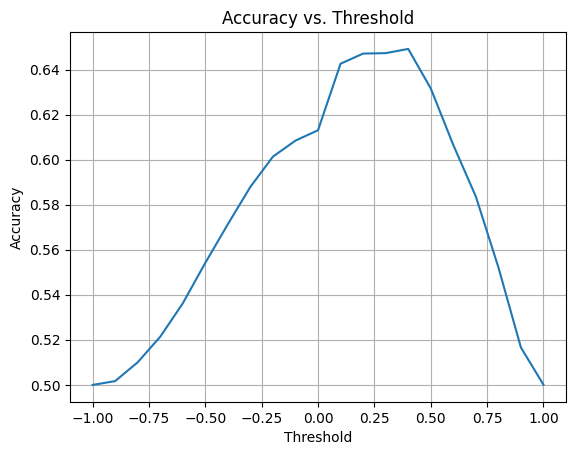

Threshold 0.3999999999999997
Maximum Accuracy: 0.6491886314604634


In [19]:
analyzer = SentimentIntensityAnalyzer()
threshold_values = np.arange(-1, 1.1, 0.1)

thresholds = []
accuracies = []

for threshold in threshold_values:
    predicted_sentiments = []
    for sentence in data['Sentence']:
        sentiment_scores = analyzer.polarity_scores(sentence)
        if sentiment_scores['compound'] >= threshold:
            predicted_sentiments.append(1)
        else:
            predicted_sentiments.append(0)

    actual_sentiments = data['Sentiment'].tolist()
    accuracy = accuracy_score(actual_sentiments, predicted_sentiments)
    thresholds.append(threshold)
    accuracies.append(accuracy)

plt.plot(thresholds, accuracies)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold')
plt.grid(True)
plt.show()

print("Threshold",thresholds[accuracies.index(max(accuracies))])
print("Maximum Accuracy:",max(accuracies))

As compared to VADER and TextBlob, our model showed considerably better results. This is probaby attributed to the reason that our model is trained on lexicons based on movie reviews.  This is unlike the two pretrained model which relies on social media to obtain textual data, which may not fit the language behaviours in movie reviews.

However, as compared to general literature with similar approaches, the model may not be performing as well as current models in terms of accuracy, as seen in relevant articles by Adam, Rosli and Soh (2021). However, do take note that the dataset by the articles is way larger than our dataset, thus this may affect the performance of the model trained.

References:
1. N. L. Adam, N. H. Rosli and S. C. Soh, "Sentiment Analysis on Movie Review using Naïve Bayes," 2021 2nd International Conference on Artificial Intelligence and Data Sciences (AiDAS), 2021, pp. 1-6, doi: 10.1109/AiDAS53897.2021.9574419.